<a href="https://colab.research.google.com/github/hamedmirsadeghi/DeepLearning/blob/main/Keras_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model



In [4]:
# Print the model summary



***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [206]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Softmax, Lambda
import keras.backend as K

#### Build a convolutional neural network model

In [207]:
# Build the Sequential convolutional neural network model
model = Sequential()
model.add( Conv2D( filters= 16, kernel_size=3,activation='relu', input_shape = (28,28,1)) )
print(model.output_shape)
model.add(MaxPooling2D(pool_size=(3,3)) )
print(model.output_shape)
model.add(Flatten( ))
model.add(Dense( 10, activation='softmax'))
print(model.output_shape)



(None, 26, 26, 16)
(None, 8, 8, 16)
(None, 10)


In [208]:

# Print the model summary
print(model.summary())


Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________
None


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [262]:
# Define the model optimizer, loss function and metrics
# model.compile(optimizer='adam' , # sgd , rmspro
#               loss='sparse_categorical_crossentropy', 
#               metrics=['accuracy']) # mae, mpe,

model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.005),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = [tf.keras.metrics.sparse_categorical_accuracy,
                         tf.keras.metrics.sparse_top_k_categorical_accuracy,
                         tf.keras.metrics.categorical_accuracy]
                         )

# model.compile(
#             optimizer=tf.keras.optimizers.Adadelta(),
#             loss='sparse_categorical_crossentropy',
#             metrics=['sparse_categorical_accuracy'])

In [263]:
# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.metrics)


[]


***
<a id="coding_tutorial_4"></a>
## The fit method

In [264]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [265]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [266]:
# Print the shape of the training data
print(train_images.shape)
print(train_labels.shape)


(60000, 28, 28)
(60000,)


In [267]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

print(train_labels[0])

9


In [268]:
# Rescale the image values so that they lie in between 0 and 1.
train_images= train_images/255
test_images = test_images/255


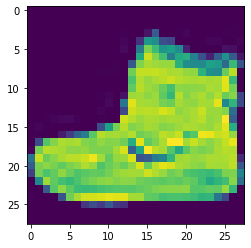

label: Ankle boot 


In [269]:
# Display one of the images
i=0
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f"label: {labels[train_labels[i]]} ")


#### Fit the model

In [271]:
# Fit the model
history = model.fit(train_images[...,np.newaxis], train_labels, epochs = 2, batch_size=256, verbose =2 )


Epoch 1/2
235/235 [==============================] - 14s 61ms/step - loss: 0.3026 - sparse_categorical_accuracy: 0.8921 - sparse_top_k_categorical_accuracy: 0.9984 - categorical_accuracy: 0.1032
Epoch 2/2
235/235 [==============================] - 14s 60ms/step - loss: 0.2913 - sparse_categorical_accuracy: 0.8956 - sparse_top_k_categorical_accuracy: 0.9985 - categorical_accuracy: 0.1027


#### Plot training history

In [272]:
# Load the history into a pandas Dataframe
df= pd.DataFrame(history.history)
df.head()


,loss,sparse_categorical_accuracy,sparse_top_k_categorical_accuracy,categorical_accuracy
0,0.302629,0.892150,0.9984,0.103233
1,0.291263,0.895583,0.9985,0.102700


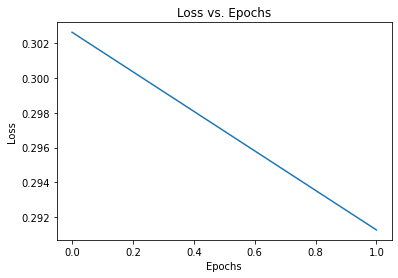

In [275]:
# Make a plot for the loss
loss_plot = df.plot(y='loss', title = "Loss vs. Epochs", legend = False);
loss_plot.set(xlabel='Epochs', ylabel ='Loss');


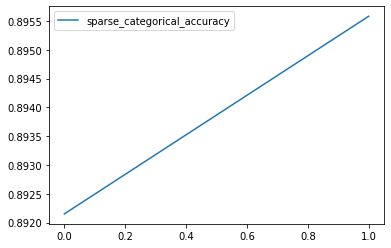

In [277]:
# Make a plot for the accuracy
df.plot(y='sparse_categorical_accuracy');


In [ ]:
# Make a plot for the additional metric



***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [278]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [280]:
# Evaluate the model
model.evaluate(test_images[...,np.newaxis], test_labels )


313/313 [==============================] - 2s 6ms/step - loss: 0.3254 - sparse_categorical_accuracy: 0.8846 - sparse_top_k_categorical_accuracy: 0.9978 - categorical_accuracy: 0.1085


[0.3253880441188812,
 0.8845999836921692,
 0.9977999925613403,
 0.10849999636411667]

#### Make predictions from the model

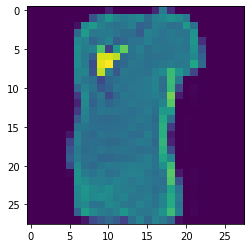

Label: T-shirt/top


In [281]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [284]:
test_image[...,np.newaxis].shape

(28, 28, 1)

In [288]:
# Get the model predictions
y_pred = model.predict(test_image[np.newaxis,...,np.newaxis])
labels[np.argmax(y_pred)]

'T-shirt/top'